In [6]:
import pandas as pd
import numpy as np

df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
df['Gender'] = np.where(df['Gender']=='Male', 0, 1)

In [16]:
training_set = df.drop(columns = ['CustomerID'])
training_set

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


In [18]:
data = training_set.values
data

array([[  0,  19,  15,  39],
       [  0,  21,  15,  81],
       [  1,  20,  16,   6],
       [  1,  23,  16,  77],
       [  1,  31,  17,  40],
       [  1,  22,  17,  76],
       [  1,  35,  18,   6],
       [  1,  23,  18,  94],
       [  0,  64,  19,   3],
       [  1,  30,  19,  72],
       [  0,  67,  19,  14],
       [  1,  35,  19,  99],
       [  1,  58,  20,  15],
       [  1,  24,  20,  77],
       [  0,  37,  20,  13],
       [  0,  22,  20,  79],
       [  1,  35,  21,  35],
       [  0,  20,  21,  66],
       [  0,  52,  23,  29],
       [  1,  35,  23,  98],
       [  0,  35,  24,  35],
       [  0,  25,  24,  73],
       [  1,  46,  25,   5],
       [  0,  31,  25,  73],
       [  1,  54,  28,  14],
       [  0,  29,  28,  82],
       [  1,  45,  28,  32],
       [  0,  35,  28,  61],
       [  1,  40,  29,  31],
       [  1,  23,  29,  87],
       [  0,  60,  30,   4],
       [  1,  21,  30,  73],
       [  0,  53,  33,   4],
       [  0,  18,  33,  92],
       [  1,  

In [19]:
from minisom import MiniSom  

import matplotlib.pyplot as plt
%matplotlib inline

In [81]:
help(MiniSom.topographic_error)

Help on function topographic_error in module minisom:

topographic_error(self, data)
    Returns the topographic error computed by finding
    the best-matching and second-best-matching neuron in the map
    for each input and then evaluating the positions.
    
    A sample for which these two nodes are not adjacent counts as
    an error. The topographic error is given by the
    the total number of errors divided by the total of samples.
    
    If the topographic error is 0, no error occurred.
    If 1, the topology was not preserved for any of the samples.



In [22]:
data.shape[1]

4

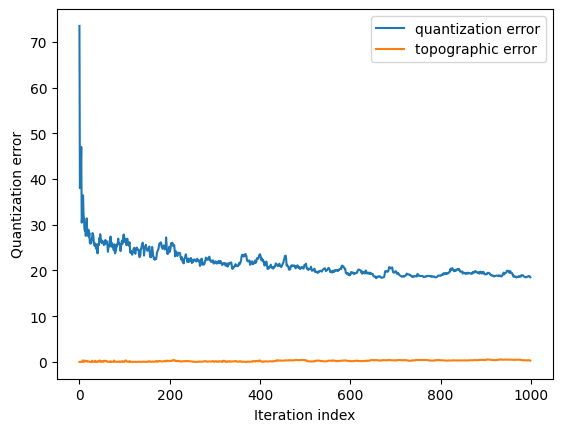

In [23]:
# I use linear som topography
# 5 es el numero de clusters 

som = MiniSom(1, 5, 4, sigma=1, learning_rate=0.5, decay_function='asymptotic_decay', neighborhood_function='gaussian', 
topology='rectangular', activation_distance='euclidean', random_seed=0, sigma_decay_function='asymptotic_decay')

max_iter = 1000
q_error = []
t_error = []

for i in range(max_iter):
    rand_i = np.random.randint(len(data))
    som.update(data[rand_i], som.winner(data[rand_i]), i, max_iter)
    q_error.append(som.quantization_error(data))
    t_error.append(som.topographic_error(data))

plt.plot(np.arange(max_iter), q_error, label='quantization error')
plt.plot(np.arange(max_iter), t_error, label='topographic error')
plt.ylabel('Quantization error')
plt.xlabel('Iteration index')
plt.legend()
plt.show()

In [24]:
# each neuron represents a cluster
winner_coordinates = np.array([som.winner(x) for x in data]).T
winner_coordinates

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
        3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
        3, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1,
        2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1,
        1, 2, 2, 1, 2, 

In [29]:
som.winner(data[0])

(0, 3)

In [26]:
len(winner_coordinates[0])

200

In [27]:
len(winner_coordinates[1])

200

In [30]:
training_set['cluster'] = winner_coordinates[1]

In [79]:
training_set.groupby(['cluster','Gender']).agg({'Age':[min, max, np.mean], 
                                     'Annual Income (k$)':[min, max, np.mean],
                                   'Spending Score (1-100)':[min, max, np.mean],
                                   'Age':[min, max, np.mean]})

/tmp/ipykernel_10854/2719765602.py:1: FutureWarning:

The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.

/tmp/ipykernel_10854/2719765602.py:1: FutureWarning:

The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.

/tmp/ipykernel_10854/2719765602.py:1: FutureWarning:

The provided callable <function mean at 0x7610c25cf400> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.



Age                Annual Income (k$)                  \
               min max       mean                min  max       mean   
cluster Gender                                                         
0       0       27  40  33.277778                 69  137  87.111111   
        1       27  38  32.190476                 70  120  86.047619   
1       0       18  35  23.700000                 15   67  42.150000   
        1       18  35  25.533333                 16   65  41.000000   
2       0       38  70  56.727273                 43   71  55.045455   
        1       32  68  50.862069                 40   69  55.620690   
3       0       19  67  48.333333                 15   39  24.666667   
        1       20  65  43.214286                 16   39  27.357143   
4       0       19  59  39.315789                 71  137  85.894737   
        1       23  57  41.388889                 70  126  89.055556   

               Spending Score (1-100)                 
                                  min max       mean  
cluster Gender                                        
0       0                          63  97  82.666667  
        1                          69  95  81.666667  
1       0                          41  92  64.250000  
        1                          41  99  63.333333  
2       0                          35  60  48.772727  
        1                          40  59  49.137931  
3       0                           3  39  19.666667  
        1                           5  40  21.714286  
4       0                           1  36  12.947368  
        1                           5  40  23.722222

In [32]:
x = training_set['Age']
y = training_set['Annual Income (k$)']
z = training_set['Spending Score (1-100)']
c = training_set['Age']

In [35]:
## MALE / FEMALE

male = training_set[training_set['Gender']==0]
female = training_set[training_set['Gender']==1]

In [41]:
female['Age'].values

array([20, 23, 31, 22, 35, 23, 30, 35, 58, 24, 35, 35, 46, 54, 45, 40, 23,
       21, 49, 21, 42, 30, 36, 20, 65, 31, 49, 24, 50, 27, 29, 31, 49, 31,
       50, 51, 27, 67, 54, 43, 68, 32, 47, 60, 60, 45, 23, 49, 46, 21, 55,
       22, 34, 50, 68, 40, 32, 47, 27, 23, 49, 21, 66, 19, 38, 18, 19, 63,
       49, 51, 50, 38, 40, 23, 31, 25, 31, 29, 44, 35, 57, 28, 32, 32, 34,
       44, 38, 47, 27, 30, 30, 56, 29, 31, 36, 33, 36, 52, 30, 37, 32, 29,
       41, 54, 41, 36, 34, 32, 38, 47, 35, 45])

In [70]:
x=female['Age'].values
y=female['Annual Income (k$)'].values
z=female['Spending Score (1-100)'].values
c=female['cluster'].values

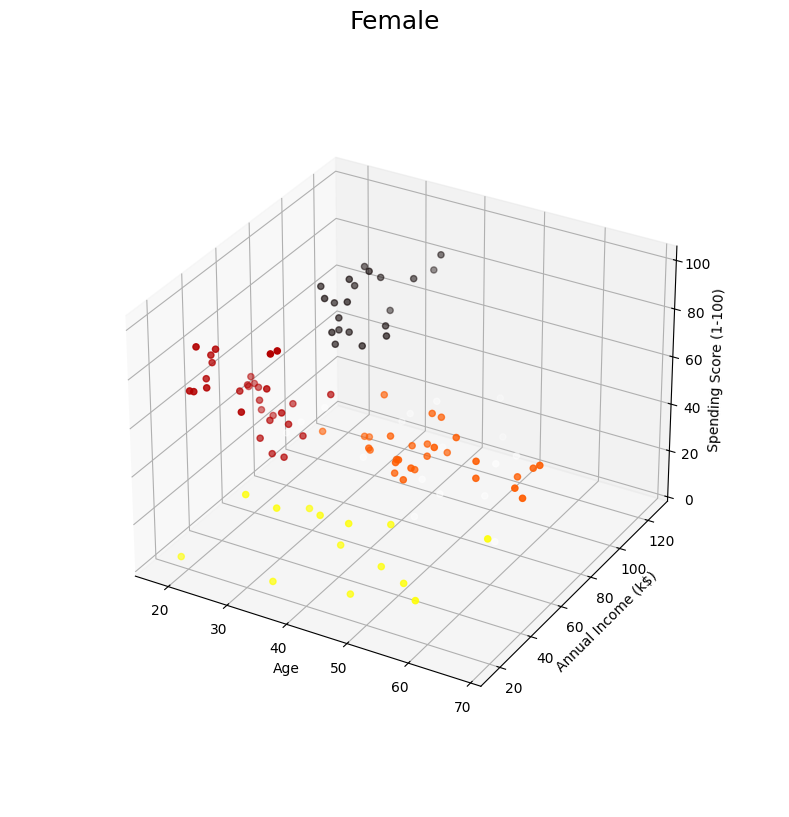

In [71]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
img = ax.scatter(x, y, z, c = c)

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('Female', fontsize=18)

ax.set_box_aspect(aspect=None, zoom=0.8)
plt.show()

In [72]:
x=male['Age'].values
y=male['Annual Income (k$)'].values
z=male['Spending Score (1-100)'].values
c=male['cluster'].values

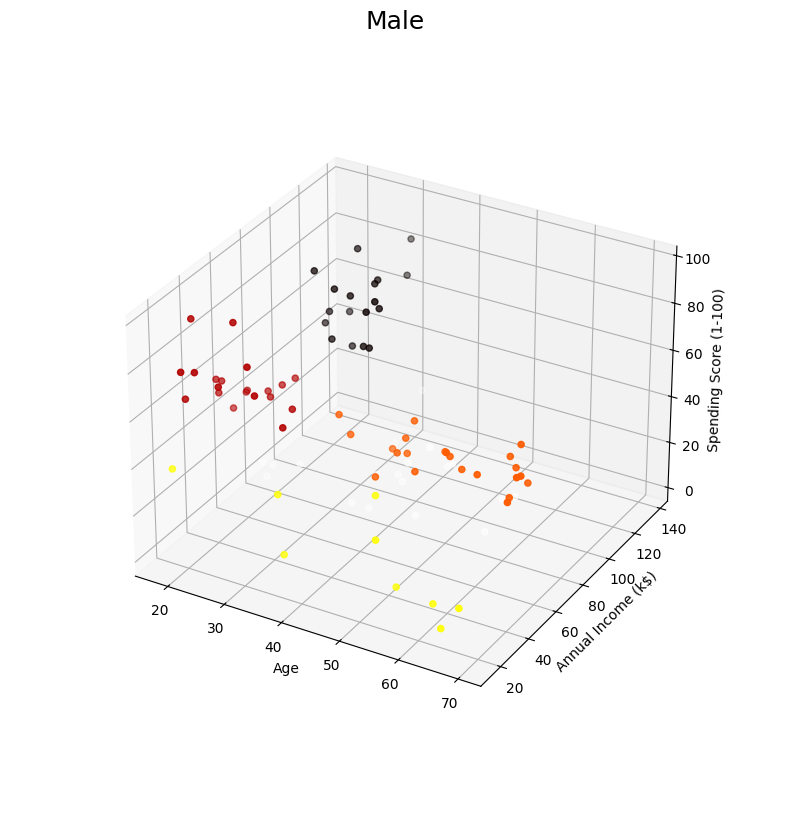

In [73]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
img = ax.scatter(x, y, z, c = c)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('Male', fontsize=18)

ax.set_box_aspect(aspect=None, zoom=0.8)
plt.show()